In [2]:
%load_ext autoreload
%autoreload 2

import os
import sys
import numpy as np
import pickle
import lzma
import matplotlib.pyplot as plt
sys.path.insert(0, os.path.abspath('/home/suryakalia/documents/summer/exploration/kasthurilab_connectomics/'))
# Need to add above path since VSCode Jupyter Notebook doesn't respect system's $PYTHONPATH variable
# This will be eliminated once my module is converted to a conda package and installed to the conda env

In [3]:
from sk_connectomics.core.dilate_overlap import DilateOverlap

KeyboardInterrupt: 

In [4]:
dilator = DilateOverlap(cremi_file_path="/home/suryakalia/documents/summer/datasets/cremi/sample_A_20160501.hdf",
                        output_dir="/scratch/midway3/suryakalia/outputs/cremi_A_crops",
                        dilation_voxel_count=1,
                        voxel_volume_threshold=50)

In [5]:
dilator.blacklist_append([20474])

In [5]:
dilator.run()

Z layer num: 0
Z layer num: 1
Z layer num: 2
Z layer num: 3
Z layer num: 4
Z layer num: 5
Z layer num: 6
Z layer num: 7
Z layer num: 8
Z layer num: 9
Trimming invalid segments
Cropping out bounding boxes
Successfully created  1129  segment corps


In [13]:
dilator.trim_invalid_segments()

Trimming invalid segments


KeyError: 885

In [ ]:
dilator.crop_out_bounding_boxes()

In [10]:
dilator.segment_black_list

[20474]

In [12]:
dilator.segment_volume_map[136939]

49

In [14]:
with lzma.open("/scratch/midway3/suryakalia/outputs/cremi_A_crops/crops/1128_187690.xz", "rb") as f:
  mask = pickle.load(f)

In [15]:
mask.shape

(3, 11, 10)

In [16]:
print(mask[1,:, :])

[[0 1 1 1 1 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0]
 [1 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 0 0 0]
 [0 0 1 1 1 0 0 0 0 0]]


In [9]:
from scipy import ndimage

In [13]:
dilated_mask = ndimage.binary_dilation(mask).astype(mask.dtype)
print(dilated_mask[0,:,:])

[[0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 0 0 0 0 0]
 [0 1 1 1 1 1 0 0 0 0]
 [0 0 1 1 1 1 1 1 0 0]
 [0 0 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 0 0]
 [0 0 1 1 1 1 1 0 0 0]
 [0 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [9]:
dilator.overlap_segments()

Number of crops read =  8795
Calculating segment overlaps


  0%|          | 0/8794 [00:00<?, ?it/s]

  0%|          | 0/8794 [00:22<?, ?it/s]


KeyboardInterrupt: 

In [15]:
with lzma.open("/scratch/midway3/suryakalia/outputs/cremi_A_crops/overlaps/3865_10338.xz", "rb") as f:
  overlap_crop = pickle.load(f)

In [16]:
overlap_crop.shape

(125, 180, 158)

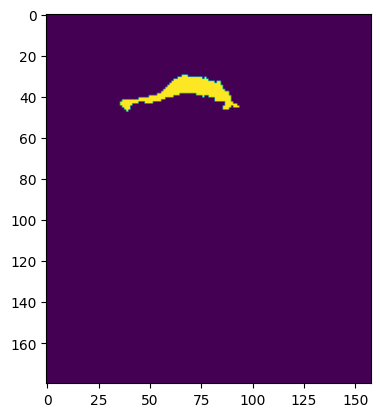

In [21]:
plt.imshow(overlap_crop[100,:,:])

In [6]:
with lzma.open("/home/suryakalia/documents/summer/tests/cremi_A_crops/overlap_img_combined.xz", "rb") as f:
  overlap_common = pickle.load(f)

In [7]:
overlap_common.shape

(125, 1250, 1250)

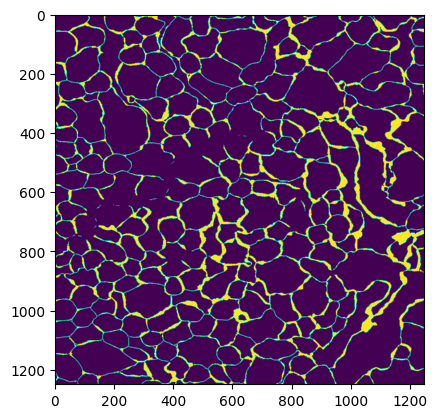

In [9]:
plt.imshow(overlap_common[0,:,:])

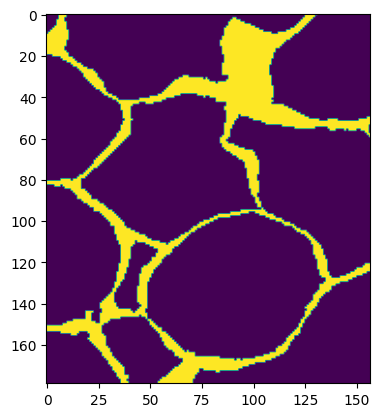

In [10]:
plt.imshow(overlap_common[100,902:1081,223:380])